# RadioML dataset - 2016.10A
----

- It is a synthetic dataset generated with GNU Radio.
- Consists of 11 modulations (8 digital and 3 analog) - E.g. - `8PSK`, `QPSK`, etc. Along with varying SNR ratios.
- [Source](https://www.deepsig.ai/datasets).

In [54]:
%matplotlib inline
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,7)
plt.rcParams.update({'font.size': 15})
plt.style.use('fivethirtyeight')

In [2]:
# Import the pickled raw file
path = "/Volumes/DHIRAJ/B.Tech/Project-1/RML2016.10a_dict.pkl"
with open(path, 'rb') as pic_file:
    data = pickle.load(pic_file, encoding='latin1')

## About the dataset -
---

In [43]:
snr_vals, mod_classes = map(lambda j: sorted(list(set(map(lambda x: x[j], data.keys())))), [1,0])
print("Data is originally stored in a dictionary format with keys as (modulation, SNR value).")
print(f"Input Data shape: {data[('QAM16', 18)].shape}")
print(f"Total labels: {len(data.keys())}")
print(f"Modulation Techniques: {mod_classes}")
print(f"SNR values: {snr_vals}")

Data is originally stored in a dictionary format with keys as (modulation, SNR value).
Input Data shape: (1000, 2, 128)
Total labels: 220
Modulation Techniques: ['8PSK', 'AM-DSB', 'AM-SSB', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK', 'WBFM']
SNR values: [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


## Exploratory Data analysis
---

### Different signal representations
---

In [88]:
def plot_data(samples, mod_name, SNR, plot_type="iq"):
    I_values = samples[0]
    Q_values = samples[1]
    signal = I_values + 1j * Q_values
    if plot_type == "iq":
        plt.plot(I_values, label="I values", c='r', linewidth=3, alpha=0.75)
        plt.plot(Q_values, label="Q values", linewidth=3, alpha=0.75)
        plt.plot(np.abs(signal), label="Amplitude", c='b', linewidth=4, alpha=0.85)
        plt.title(f"{mod_name}-{str(SNR)}")
        plt.legend()
        plt.show()
    if plot_type == "ph_amp":
        plt.subplot(1,2,1)
        plt.suptitle("Amplitude and Phase Vs Time")
        plt.plot(np.abs(signal), label="Amplitude", c='b', linewidth=3, alpha=0.75)
        plt.legend()
        plt.subplot(1,2,2)
        plt.plot(np.angle(signal), label="Phase", c='g', linewidth=3, alpha=0.75)
        plt.legend()
        plt.show()
    if plot_type == "spec":
        spec = plt.specgram(signal,  Fs=1000, mode='magnitude')
        plt.colorbar()
        plt.show()

In [67]:
d = plt.magnitude_spectrum(c, Fs=1000)
plt.show()

NameError: name 'c' is not defined

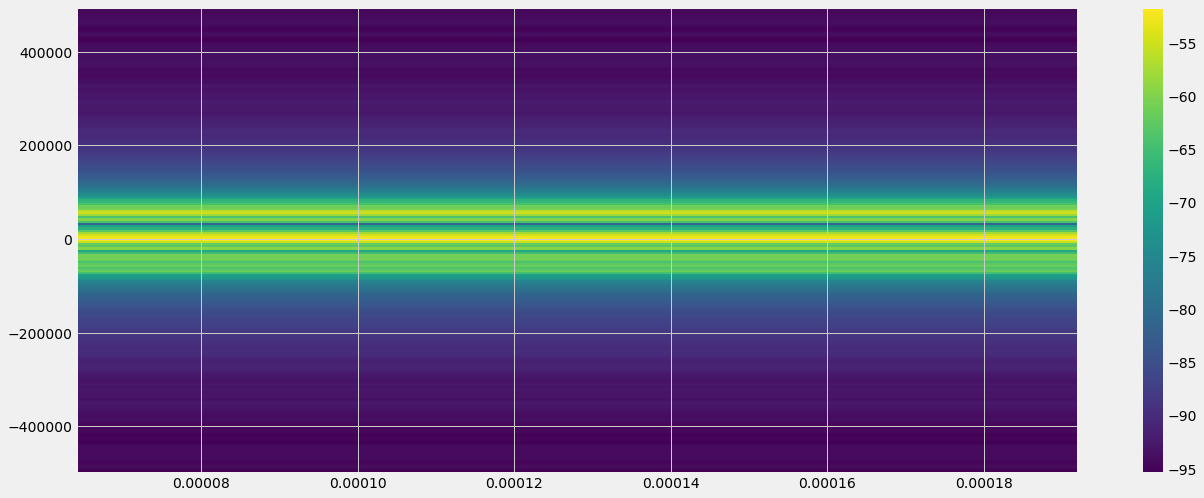

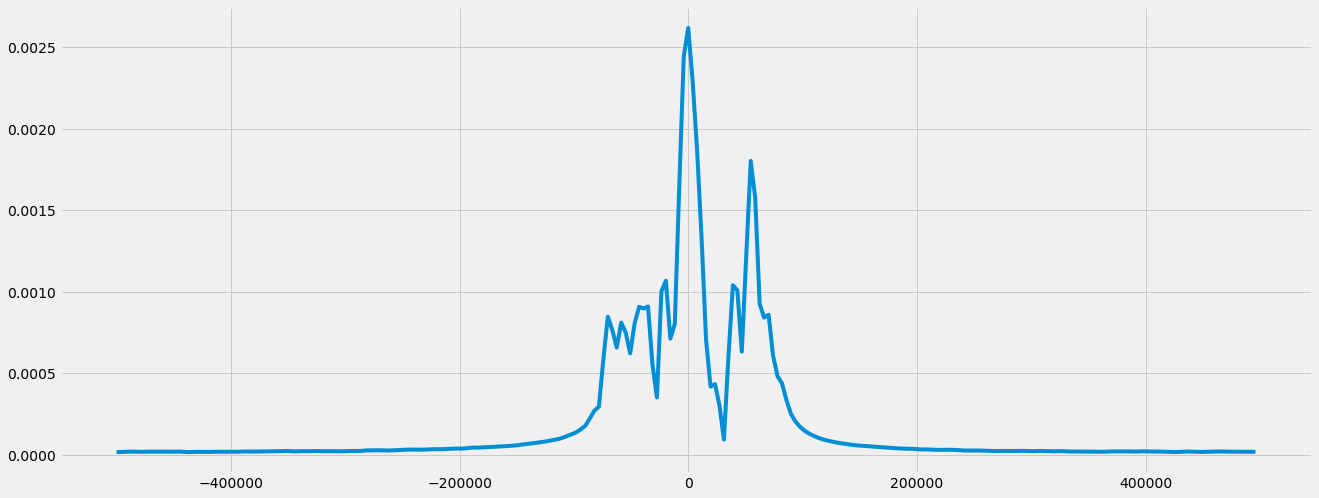

In [122]:
ex = data[("QAM16", 18)][0]
i = ex[0]
q = ex[1]
c = i + 1j * q
s = plt.specgram(c,  Fs=1000000, mode='magnitude')
plt.colorbar()
plt.show()
plt.plot(s[1], s[0])
plt.show()

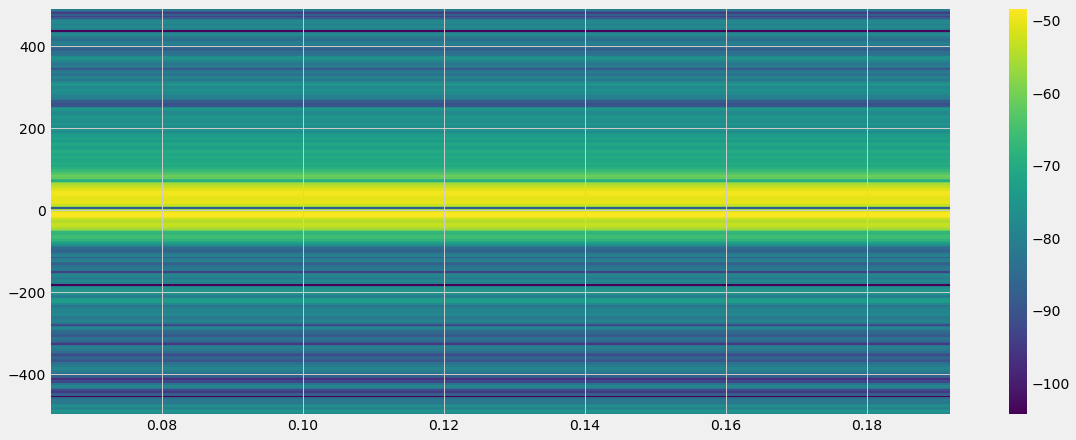

In [91]:
plot_data(data[("QPSK", 10)][0], "AM-SSB", 10, "spec")
# plot_data(data[("QPSK", 2)][0], "QPSK", 2)
# plot_data(data[("AM-SSB", 2)][0], "AM-SSB", 2)

In [34]:
x, y = map(lambda j: sorted(list(map(lambda x: x[j], data.keys()))), [1,0])

220

In [33]:
snrs, mods = map(lambda j: sorted(list(set(map(lambda x: x[j], data.keys())))), [1,0])
snrs

[-20,
 -18,
 -16,
 -14,
 -12,
 -10,
 -8,
 -6,
 -4,
 -2,
 0,
 2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18]

In [6]:
data[('BPSK', 4)][0][1]

array([-9.75185656e-04,  2.54355813e-03, -4.66765778e-04, -3.13398312e-03,
       -2.62665586e-03,  7.87542108e-03, -8.76840670e-03, -7.29949446e-03,
       -2.92240037e-03,  3.01674451e-03,  1.49841551e-04, -1.15325500e-03,
       -6.21989276e-03, -4.76666540e-03, -3.68017773e-03,  5.83825354e-03,
       -5.13169635e-03, -7.37266475e-03,  1.47026777e-03, -7.67186284e-03,
       -6.07365463e-03, -8.15702509e-03,  2.80115008e-03, -4.01210692e-03,
        7.86815397e-03, -1.17509272e-02,  4.43760713e-04, -2.44667800e-03,
        1.45171431e-03, -1.57555216e-03,  2.36704363e-03, -3.85154411e-03,
        9.95497126e-03, -4.50751744e-03,  3.12309363e-03, -9.66207311e-03,
       -7.77248992e-03, -1.92634494e-03, -1.02811411e-03, -7.55701493e-03,
       -3.23081552e-03, -1.47964188e-03, -2.22093216e-03, -8.49911198e-03,
        6.65956177e-04, -3.98286153e-03,  2.58898642e-03,  3.52040795e-03,
        2.83599924e-03,  3.44698026e-04, -6.84457272e-03, -1.17759416e-02,
        3.65026761e-03,  

In [8]:
data[('BPSK', 4)]

(1000, 2, 128)